In [63]:
#import necessary libraries
import pandas as pd
import nltk
import sys # needed this for certain print options during debugging
import numpy as np #lmao why did we not have this before
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#load the dataset
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('Steam Game Review.csv')
# inserting a new column called tags
# data.insert(2, 'tags', '')
data.head(2)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1


In [14]:
#dataset facts
data.shape

(17494, 5)

In [15]:
#dataset facts
data['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [16]:
#dataset facts
data['title'].nunique()

44

In [17]:
# Adding tags to the games here
data['title'].unique()

array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
       'Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'Realm of the Mad God', 'Elsword',
       'theHunter Classic', 'Eternal Card Game', 'Black Squad',
       'Freestyle 2: Street Basketball', 'Bless Online',
       'RaceRoom Racing Experience', 'Fallout Shelter',
       'Tactical Monsters Rumble Arena', 'Creativerse', 'Dreadnought',
       'Infestation: The New Z', 'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'Crusaders of the Lost Idols', 'AdventureQuest 3D',
       'Realm Grinder', 'World of Guns: Gun Disassembly',
       'Bloons TD Battles', 'Cuisine Royale', 'School of Drago

In [48]:
# Now that we have about 44 games in unique, we will iterate through the dataset and add tags to them manually.
# Oh, this will be a pain in the ass I think xdd

# Now we'll iterate through the rows and start adding tags based on the 'title' column
tags_cols = []
for index, row in data.iterrows():
    if(row['title'] == "Spooky's Jump Scare Mansion"):
        tags_cols.append(['Action', 'Adventure', 'Free to Play', 'Indie'])
    if(row['title'] == "Sakura Clicker"):
        tags_cols.append(['Casual', 'Free to Play', 'Indie'])
    if(row['title'] == "WARMODE"):
        tags_cols.append(['Action', 'Free to Play'])
    if(row['title'] == "Fractured Space"):
        tags_cols.append(['Action', 'Indie', 'Early Access'])
    if(row['title'] == "Dota 2"):
        tags_cols.append(['Action', 'Free to Play', 'Strategy'])
    if(row['title'] == "Path of Exile"):
        tags_cols.append(['Action', 'Adventure', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "War Thunder"):
        tags_cols.append(['Action', 'Free to Play', 'Massively Multiplayer', 'Simulation'])
    if(row['title'] == "Ring of Elysium"):
        tags_cols.append(['Action', 'Free to Play', 'Massively Multiplayer'])
    if(row['title'] == "Team Fortress 2"):
        tags_cols.append(['Action', 'Free to Play'])
    if(row['title'] == "Yu-Gi-Oh! Duel Links"):
        tags_cols.append(['Free to Play', 'Strategy'])
    if(row['title'] == "SMITE®"):
        tags_cols.append(['Action', 'Free to Play'])
    if(row['title'] == "Brawlhalla"):
        tags_cols.append(['Action', 'Free to Play', 'Indie'])
    if(row['title'] == "World of Tanks Blitz"):
        tags_cols.append(['Action', 'Free to Play', 'Massively Multiplayer'])
    if(row['title'] == "DCS World Steam Edition"):
        tags_cols.append(['Free to Play', 'Simulation'])
    if(row['title'] == "Heroes & Generals"):
        tags_cols.append(['Action', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Strategy'])
    if(row['title'] == "The Elder Scrolls®: Legends™"):
        tags_cols.append(['Free to Play'])
    if(row['title'] == "Trove"):
        tags_cols.append(['Action', 'Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "Neverwinter"):
        tags_cols.append(['Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "Realm Royale"):
        tags_cols.append(['Action', 'Free to Play', 'Early Access'])
    if(row['title'] == "PlanetSide 2"):
        tags_cols.append(['Action', 'Free to Play', 'Massively Multiplayer'])
    if(row['title'] == "Realm of the Mad God"):
        tags_cols.append(['Action', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "Elsword"):
        tags_cols.append(['Action', 'Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "theHunter Classic"):
        tags_cols.append(['Action', 'Adventure', 'Free to Play', 'Simulation', 'Sports'])
    if(row['title'] == "Eternal Card Game"):
        tags_cols.append(['Casual', 'Free to Play', 'Massively Multiplayer', 'Strategy'])
    if(row['title'] == "Black Squad"):
        tags_cols.append(['Action', 'Free to Play'])
    if(row['title'] == "Freestyle 2: Street Basketball"):
        tags_cols.append(['Action, Casual', 'Free to Play', 'Massively Multiplayer', 'Sports'])
    if(row['title'] == "Bless Online"):
        tags_cols.append(['Action', 'Free to Play', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "RaceRoom Racing Experience"):
        tags_cols.append(['Free to Play', 'Racing', 'Simulation', 'Sports'])
    if(row['title'] == "Fallout Shelter"):
        tags_cols.append([' Free to Play', 'RPG', 'Simulation'])
    if(row['title'] == "Tactical Monsters Rumble Arena"):
        tags_cols.append(['Adventure', 'Free to Play', 'Indie', 'RPG', 'Strategy'])
    if(row['title'] == "Creativerse"):
        tags_cols.append(['Action', 'Adventure', 'Casual', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "Dreadnought"):
        tags_cols.append(['Action', 'Free to Play', 'Massively Multiplayer'])
    if(row['title'] == "Infestation: The New Z"):
        tags_cols.append(['Action', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "Shop Heroes"):
        tags_cols.append(['Role-playing game', 'Simulation Video Game', 'Free-to-play', 'Casual game', 'Massively Multiplayer', 'Strategy'])
    if(row['title'] == "Robocraft"):
        tags_cols.append(['Action', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG', 'Simulation'])
    if(row['title'] == "Business Tour - Board Game with Online Multiplayer"):
        tags_cols.append(['Casual', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Strategy'])
    if(row['title'] == "Crusaders of the Lost Idols"):
        tags_cols.append(['Casual', 'Free to Play', 'Indie'])
    if(row['title'] == "AdventureQuest 3D"):
        tags_cols.append(['Role-playing game', 'Free-to-play', 'Action game', 'Indie game', 'Casual game', 'Massively Multiplayer', 'Adventure'])
    if(row['title'] == "Realm Grinder"):
        tags_cols.append(['Free to Play', 'RPG', 'Strategy'])
    if(row['title'] == "World of Guns: Gun Disassembly"):
        tags_cols.append(['Free to Play', 'Indie', 'Simulation'])
    if(row['title'] == "Bloons TD Battles"):
        tags_cols.append(['Action', 'Free to Play', 'Strategy'])
    if(row['title'] == "Cuisine Royale"):
        tags_cols.append(['Action game', 'Free-to-play', 'Massively Multiplayer'])
    if(row['title'] == "School of Dragons"):
        tags_cols.append(['Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG'])
    if(row['title'] == "EverQuest II"):
        tags_cols.append(['Free to Play', 'Massively Multiplayer', 'RPG'])

In [51]:
# Now that we have added all the tags to our games, it is time to append it to our dataset.
data.insert(2, 'tags', tags_cols)
# !!ATTENTION!!
# You might run into an error here, `cannot insert tags, already exists`. However, that just means that you have run this code once before. 
# Dont stress, to make sure that things are working, just look at thhe sample of the data and you should see all the tags.

ValueError: cannot insert tags, already exists

In [52]:
# Now lets take a look at some of the random samples to see if it worked.
data.sample(5)

,review_id,title,tags,year,user_review,user_suggestion
2100,2564,Path of Exile,"[Action, Adventure, Free to Play, Indie, Massively Multiplayer, RPG]",2018.0,Yes. What Diablo 4 could be if Blizzard got their act together. Basically plays like Diablo 2 with a modern day MTX system for cosmetic stuff. The layout is similiar to Guild Wars 1 in that you have MMO-style gathering hubs with instanced areas just for you and your group.,1
12417,17914,RaceRoom Racing Experience,"[Free to Play, Racing, Simulation, Sports]",2013.0,I think this game is one to watch. It really is a very high quality racing simulator especially considering it is free. A little too far down the realism spectrum for my liking though. The main problem is that there is no sense of accomplishment or incentive to keep playing. In most racing games you win races to unlock new tracks and cars which keeps you wanting to play on. But here you unlock new stuff by buying it. Also the races them self are just against the clock. There is very little sense of accomplishment from just moving a few places up the leader boards. So as I say I think this is one to keep an eye on as more content become available.,1
6512,8887,Heroes & Generals,"[Action, Free to Play, Indie, Massively Multiplayer, Strategy]",2017.0,"Where does one start here? Like really.I have 69 hours or so on this game. However, I bought it about a month before the Soviets were added.That was when the game declined. It will probably never meet the greatness that this game was before the Soviets were added. I remember picking this game up and saying, ""Hey, this looks sweet."" And it was! Germany and America dueling it out. Skirmishes was the best and both teams seemed to take turns winning wars. Simply because they both had good, experienced Generals/Officers.So what happened? Well the Soviet Union came in. And because the CoD generation of gamers exists, they went to the Soviets because of their stronkness. And so that team got flooded and everyone whined that they weren't good enough.Right off the bat, they had buffed spawn tickets and it seemed like they had good equipment. They needed this because it saved their lives. Then it took a dark turn. They lose every war in last place but win most of the skirmishes because of some stupid HP system and some really stupid OP weapons.Another major issue: TanksFirst off, I'd like to say that when you have a machine gun in the game cost just as much as a Tiger I, you've got issues. ""So, what is the MAIN issue?"" I hear you saying aloud as you read this. Well, the tanks are their own worst enemy. If you do what their supposed to do, support Infantry as they move from objective to objective, they get wrecked by an Anti-Tank Rambo with a motorcycle and some AT Grenades. So the tanks sit back and cut people in half with 75mm's, 85mm's, and 88mm's from a mile away. So, the infantry and paratroopers are caught with their pants around their ankles with their♥♥♥♥♥ which is mooning a taxi driver in NYC by the way, hanging in the breeze. So objectives just get traded until someone, eight hours later, wins.Tanks also get killed for staying still so it's a lose/lose situation if you pick that career option.Oh and it doesn't make a difference if you are driving in a Tiger II or an M4 Sherman, your♥♥♥♥♥is molasses as Sheriff Buford T. Justice would say.Planes are an absolute joke to fly. I can't seem to do it and others can. Fly Germany if you want wings on your chest I guess? I don't know. The P-38 seems like a stupid option for an aircraft. The P-51 and P-47 were more used than the P-38 for the game's intended purpose so why is this mediocre aircraft there?Paratrooper is the best career hands down. You can join the fight anywhere your plane flies and you get that sweet sweet M1A1 Carbine. Sniper's are OP but I guess that's their role so I don't know. OHK rifles, that ones the snipers get, are realistic but they seem limited to the bolt-action rifles. Most of which fire the same ro

In [6]:
# Data processing for removing stop words, lemmatization and stemmming, and english-only.
# Importing all relevant libraries and functions here
import spacy #load spacy
from sklearn.pipeline import Pipeline # pipelining pre-processing
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
tokenizer = nlp.tokenizer

2023-01-13 10:14:02.869997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
#tokenization
def create_tokenized_dataset(data):
    tokens_list = []

    for j in data['user_review']:
#         tokens_list.append(word_tokenize(j))
        spacy_tokens = [token.orth_ for token in tokenizer(j)]
        tokens_list.append(spacy_tokens)
    data['Tokens'] = tokens_list   
    return data

df = create_tokenized_dataset(data)
df.head(1)

,review_id,title,year,user_review,user_suggestion,Tokens
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,"[I, 'm, scared, and, hearing, creepy, voices, ., , So, I, 'll, pause, for, a, moment, and, write, a, review, while, I, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, ., , This, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, (, but, more, bubble, and, ', clean, ', ), ., , Hello, 1990's, ., What, charactes, there, are, (, that, isnot, trying, to, kill, me, ), were, likable, and, a, bit, odd, ., , I, did, do, a, few, noob, things, though, ,, such, as, ...]"


In [9]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
#define stopwords
stopWords = set(stopwords.words('english'))
custom_stop = ["'m", "'ll", "'s", "'re", "n't", "'ve"]
stop_words = set(list(stopWords) + custom_stop)

In [11]:
#define punctuation
custom_punc = ["``", "''", "--", "...","♥"]
punctuation = set(list(string.punctuation) + custom_punc)

In [12]:
# nltk for removing english words
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [14]:
#data preprocessing: define functions

# created a function to deal with that pesky steam heart emoticon
# print(ord('♥'))
def remove_steam_heart(tokens):
    for token in tokens:
        if len(token) == 1:
            if(ord(token) == 9829): # 9829 is the unicode for the heart emoticon
                tokens.remove(token)
    return tokens

#lower case
def lower_case(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

#remove stopwords
def remove_stopwords(tokens):
#     tokens = [token for token in tokens if token not in stop_words]
# Using the spacy stop words set instead of the english stop words
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

#remove digits
def remove_digits(tokens):
    for token in tokens:
        if token.isdigit():
            tokens.remove(token)
    return tokens

#remove punctuation
def remove_punctuation(tokens):
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

#lemmatization
def lemmatize_words(tokens):
    for token in range(len(tokens)):
        tokens[token] = lemmatizer.lemmatize(tokens[token])
    return tokens

# Using nltk to word corpus to remove non-english words
# this method seemed cheaper and easier than spacy? maybe lol
def remove_non_english(tokens):
    tokens = [token for token in tokens if token in words]
    return tokens

In [15]:
#data preprocessing function
def data_preprocess(tokens):
    new_tokens = lower_case(tokens)
    new_tokens = remove_steam_heart(new_tokens)
    new_tokens = remove_non_english(new_tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = remove_digits(new_tokens)
    new_tokens = remove_punctuation(new_tokens)
    new_tokens = lemmatize_words(new_tokens)
    return new_tokens
    
list_of_process_tokens = []
for i in df['Tokens']:
    list_of_process_tokens.append(data_preprocess(i))

In [16]:
df['ProcessTokens'] = list_of_process_tokens    
df.sample(20)

,review_id,title,year,user_review,user_suggestion,Tokens,ProcessTokens
9753,13337,Elsword,2016.0,"Swank Animu Simulator Have you ever wanted to be a cliche Shounen Protagonist? Then this is the game for you!!! This game is AWESOME! well... now it is...As many of you can tell, this game has received a LOT of flak after ADDing the unbalanced charactersAdd (prompting my joke above) and Lu/Ciel (No I didn't randomly throw in a slash the character is 2 different people).These characters were able to (once awakened) keep an enemy in a combo for EVER (which broke PVP causing the outrage). So FINALLY KoG has responded by no... not nerfing the new characters but remaking all the old ones! (and the new ones too but they aren't out yet at the time im writing this so imma just assume that they are gonna be balanced)This is ADDresing (#sorrynotsorry) all of the problems in pvp (even if it does COMPLETELY ♥♥♥♥ over pve but who cares about that anyways?) All in all this game is really fun and INCREDIBLY fun when playing with friends! I highly reccomend it and promise you that you won't be let down!",1,"[ , Swank, Animu, Simulator, Have, you, ever, wanted, to, be, a, cliche, Shounen, Protagonist, ?, Then, this, is, the, game, for, you, !, !, !, This, game, is, AWESOME, !, well, ..., now, it, is, ..., As, many, of, you, can, tell, ,, this, game, has, received, a, LOT, of, flak, after, ADDing, the, unbalanced, charactersAdd, (, prompting, my, joke, above, ), and, Lu, /, Ciel, (, No, I, did, n't, randomly, throw, in, a, slash, the, character, is, 2, different, people).These, characters, were, able, to, (, once, awakened, ), keep, an, enemy, in, a, combo, for, EVER, (, which, ...]","[swank, simulator, cliche, protagonist, game, game, awesome, tell, game, received, lot, flak, unbalanced, joke, randomly, throw, slash, character, different, able, enemy, broke, causing, outrage, finally, new, old, new, time, m, writing, assume, gon, na, completely, anyways, game, fun, incredibly, fun, highly, promise, wo, let]"
11527,17024,Black Squad,2017.0,"Early Access ReviewWith my little time playing, I've experienced everything I need to write a solid review.It's good. It's not going to blow you away by any means, and it's not going to make you want to throw your computer out the window. It's in the sweet spot of good, and bad. It's what you'd expect from a F2P First Person Shooter. What you wouldn't expect is, a non-pay to win aspect to the game. Gaining ingame currency is not that diffcult, and will most likely bring players back who want to visit the shop more often.You're not paying anything for it, so why not try it? It's the generic arcade style shooter. Running in gunning is pretty extensive in this game, and I recommend you hop in with some friends and have some fun. With that being said, don't take this game too seriously. You're probably going to die a lot (as I did) and raging would just make it not fun. Just run, and gun and have some fun.Overall though, it's a pretty solid for what your paying... nothing.",1,"[Early, Access, ReviewWith, my, little, time, playing, ,, I, 've, experienced, everything, I, need, to, write, a, solid, review, ., It, 's, good, ., It, 's, not, going, to, blow, you, away, by, any, means, ,, and, it, 's, not, going, to, make, you, want, to, throw, your, computer, out, the, window, ., It, 's, in, the, sweet, spot, of, good, ,, and, bad, ., It, 's, what, you, 'd, expect, from, a, F2P, First, Person, Shooter, ., What, you, would, n't, expect, is, ,, a, non, -, pay, to, win, aspect, to, the, game, ., Gaining, ingame, currency, is, ...]","[early, access, little, time, experienced, need, write, solid, review, good, going, blow, away, going, want, throw, computer, window, sweet, spot, good, bad, expect, person, shooter, expect, non, pay, win, aspect, game, gaining, currency, likely, bring, want, visit, shop, paying, try, generic, arcade, style, shooter, running, gunning, pretty, extensive, game, recommend, hop, fun, said, game, seri

In [17]:
#JUST FOR FUN :)
#most common words for each category (user_suggestion=1 OR user_suggestion=0)

def words_frequency(data, rating_col, token_col, rating_nr):
    all_rating_tokens = []
    tokens = list(data[data[rating_col] == rating_nr][token_col])
    for i in tokens:
        for j in i:
            all_rating_tokens.append(j)
                
    freq = nltk.FreqDist(all_rating_tokens)
    print(freq.most_common()[0:20])
    freq.plot(10, cumulative=False)
    return freq, all_rating_tokens

[('game', 28458), ('like', 7237), ('play', 6765), ('good', 4889), ('time', 4615), ('fun', 4397), ('early', 4005), ('access', 3939), ('free', 3795), ('nope', 3235), ('great', 3005), ('lot', 2629), ('people', 2616), ('new', 2556), ('want', 2130), ('need', 2113), ('better', 1960), ('best', 1903), ('way', 1868), ('try', 1643)]


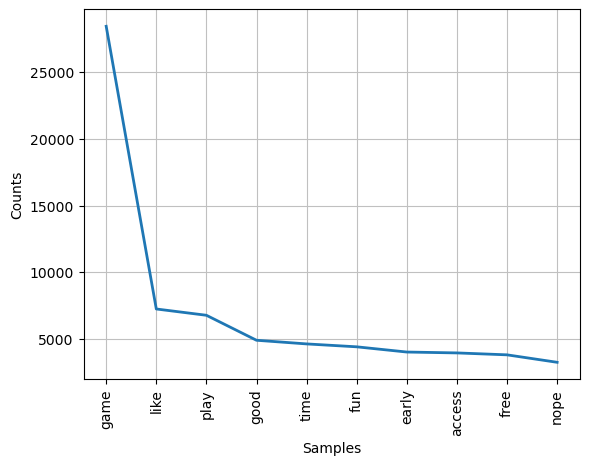

In [18]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 1)

[('game', 23714), ('play', 5105), ('like', 4795), ('time', 4427), ('good', 3012), ('access', 2963), ('early', 2915), ('money', 2892), ('fun', 2566), ('pay', 2379), ('new', 2264), ('want', 2099), ('people', 2095), ('way', 1685), ('free', 1644), ('bad', 1559), ('need', 1553), ('buy', 1530), ('better', 1513), ('lot', 1345)]


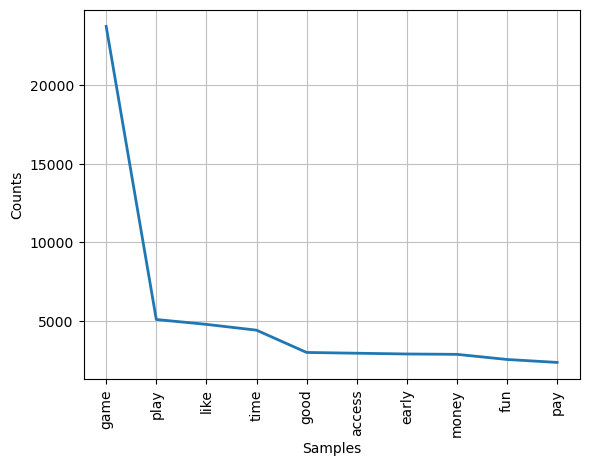

In [19]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 0)

In [20]:
#Converting the datatype of processtokens fromm list to string, so that our vectorization works right.
df['ProcessTokens'] = df['ProcessTokens'].astype("string")

In [21]:
# train test split before normalization
from sklearn.model_selection import train_test_split

X = df.drop(columns=['user_suggestion','review_id', 'year']).copy()
y = df['user_suggestion']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(13995, 4)
(13995,)
(1749, 4)
(1749,)
(1750, 4)
(1750,)


(None, None)

In [29]:
#Check for NaN-Values
print(pd.isna(X_train).values)
print(pd.isna(y_train).values)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]
[False False False ... False False False]


In [30]:
#define text vectorizers (I used two different ones, later we can decide which one we should continue with)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [43]:
#text vectorization with count_vectorizer
#vectorization on train_dataset
np.set_printoptions(threshold=sys.maxsize)
def create_vectorized_dataset_count(data):
    list_of_count_vectors = []
    data = data.tolist() # converting to a list
    count_vector = count_vectorizer.fit_transform(data)
    count_array = count_vector.toarray()
#     Uncomment the two lines below to see the count vector with feature names
#     probably might also need to remove print truncation to see the whole thing.
    dftemp = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())
    #return count_array # this is the 2d
    return count_vector

count_vector = create_vectorized_dataset_count(X_train['ProcessTokens']) # this becomes our count vectorization vector.
# we can use thhis to train our model.


/Users/soumyankar/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
#text vectorization with tfidf_vectorizer
#vectorization on train_dataset
def create_vectorized_dataset_tfidf(data):
    data = data.tolist()
    tfidf_vector = tfidf_vectorizer.fit_transform(data)
    tfidf_array = tfidf_vector.toarray()
    # prinnting non-zero colummns
    # dftemp = pd.DataFrame(data=tfidf_array, columns=tfidf_vectorizer.get_feature_names())
    # print(dftemp)
    #return tfidf_array
    return tfidf_vector

tfidf_vector = create_vectorized_dataset_tfidf(X_train['ProcessTokens'])

print(tfidf_vector.shape)
#df.head(1)

(13995, 12716)


NOTE: use either Count_Vector or TF-IDF_Vectors column as the input for ML models

Next steps: 
1. define different ML models to work with
2. split the dataset (either Count_Vector or TF-IDF_Vectors) into training and testing data
3. fit the training data to the models
4. make predictions

Further steps:

5. evaluate each model using different evaluation methods (use the testing dataset for this)

In [49]:
#transform count test data

test_count_vector = count_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_count_vector.shape)

n_samples: 1750, n_features: 12716


In [41]:
#transform tfidf test data

test_tfidf_vector = tfidf_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_tfidf_vector.shape)

n_samples: 1750, n_features: 12686


In [56]:
#Naive Bayes with count vector

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(count_vector, y_train)

y_prediction = naive_bayes_classifier.predict(test_count_vector)

print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_prediction)*100)

Multinomial Naive Bayes model accuracy(in %): 81.82857142857142


In [57]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn_clf = knn.fit(count_vector, y_train)
knn_y_pred = knn_clf.predict(test_count_vector)


print("kNN model accuracy(in %):", metrics.accuracy_score(y_test, knn_y_pred)*100)


kNN model accuracy(in %): 63.08571428571429


In [59]:
# lr
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(count_vector, y_train)
lr_y_pred = lr_clf.predict(test_count_vector)


print("LR model accuracy(in %):", metrics.accuracy_score(y_test, lr_y_pred)*100)

LR model accuracy(in %): 81.82857142857142


/Users/soumyankar/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, lr_y_pred))

Accuracy :  0.8182857142857143


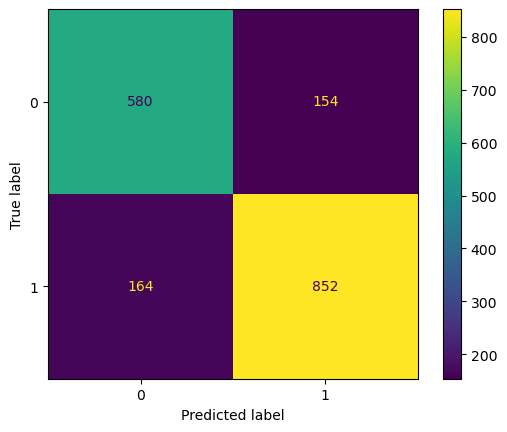

In [66]:
# printing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()